<a href="https://colab.research.google.com/github/BrianBehnke/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module2-polynomial-regression/Polynomial_Log_linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intermediate Linear Regression Practice

## Use a Linear Regression model to get the lowest RMSE possible on the following dataset:

[Dataset Folder](https://github.com/ryanleeallred/datasets/tree/master/Ames%20Housing%20Data)

[Raw CSV](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv)

## You model must include (at least):
- A log-transformed y variable
- Two polynomial features
- One interaction feature
- 10 other engineered features

What is the lowest Root-Mean-Squared Error that you are able to obtain? Share your best RMSEs in Slack!

Notes:

There may be some data cleaning that you need to do on some features of this dataset. Linear Regression will only accept numeric values and will not accept

Note* There may not be a clear candidate for an interaction term in this dataset. Include one anyway, sometimes it's a good practice for predictive modeling feature engineering in general. 

In [0]:
# Imports all in one place
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'

df = pd.read_csv(url)
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_drop = df.drop(['Id', 'MSSubClass', 'MSZoning', 'Street', 'LotShape', 
                   'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 
                   'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
                   'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                   'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 
                   'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                   'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'Heating', 
                   'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 
                   'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                   'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
                   'MiscFeature', 'SaleType', 'SaleCondition', 'Alley'], axis=1)
df_drop.head()


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


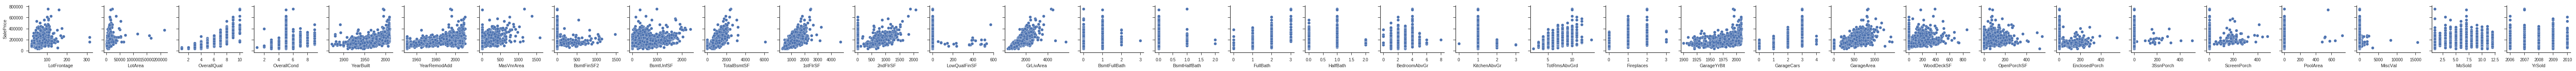

In [4]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = df_drop.columns.drop('SalePrice')

# Only plot the scatterplot of x variables with our y variable
sns.pairplot(data=df_drop, y_vars=['SalePrice'], x_vars=x_columns)

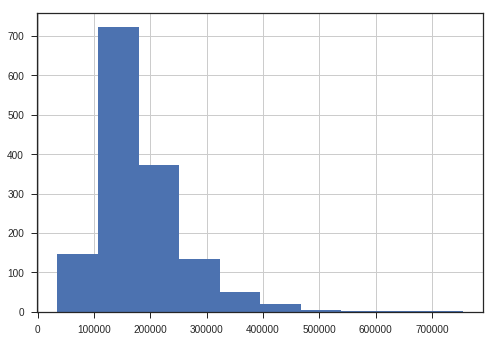

In [5]:
df_drop.SalePrice.hist()

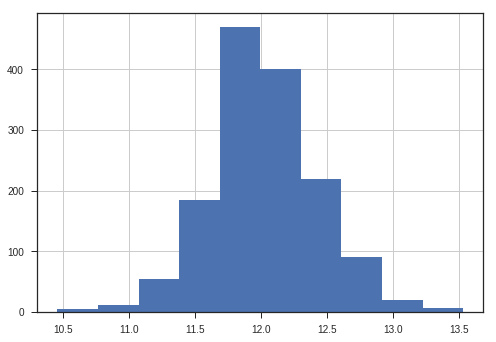

In [6]:
## generate our ln(price) variable
df_drop['ln_price'] = np.log(df_drop['SalePrice'])
df_drop.ln_price.hist()

In [0]:
#df_drop = df_drop.drop(['OverallQual_squared'], axis=1)

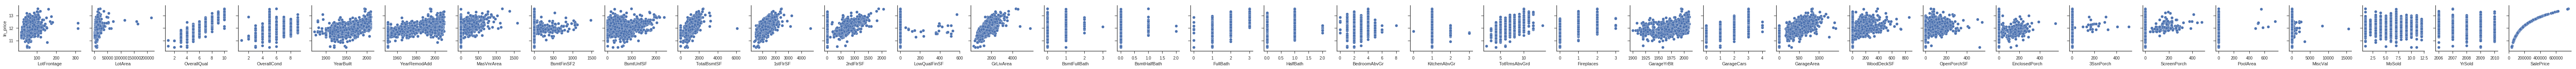

In [8]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = df_drop.columns.drop('ln_price')

# Only plot the scatterplot of x variables with our y variable
sns.pairplot(data=df_drop, y_vars=['ln_price'], x_vars=x_columns)

In [9]:
## Log-Linear Regression
# Separate dependent and independent variables
y = df_drop.loc[:, ['ln_price']].values
X = df_drop.loc[:, ['GrLivArea']].values

# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

print("coefficients: ", model.coef_[0])
print("intercepts: ", model.intercept_)

RMSE is 0.28206260427535484
R^2 is 0.5229000551118719
coefficients:  [0.00049498]
intercepts:  [11.26677141]


In [10]:
df_drop['GrLivArea_squared'] = df['GrLivArea']**2
df_drop.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,ln_price,GrLivArea_squared
0,65.0,8450,7,5,2003,2003,196.0,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,12.247694,2924100
1,80.0,9600,6,8,1976,1976,0.0,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,12.109011,1592644
2,68.0,11250,7,5,2001,2002,162.0,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,12.317167,3189796
3,60.0,9550,7,5,1915,1970,0.0,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,11.849398,2948089
4,84.0,14260,8,5,2000,2000,350.0,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,12.429216,4831204


In [11]:
## Log-Linear Regression
# Separate dependent and independent variables
y = df_drop.loc[:, ['ln_price']].values
X = df_drop.loc[:, ['GrLivArea', 'GrLivArea_squared']].values

# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

print("coefficients: ", model.coef_[0])
print("intercepts: ", model.intercept_)

RMSE is 0.2716270703808879
R^2 is 0.557549752120188
coefficients:  [ 1.04227595e-03 -1.43185037e-07]
intercepts:  [10.80619329]


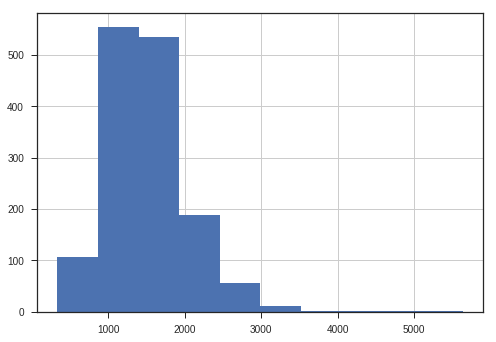

In [12]:
df_drop['GrLivArea'].hist()

In [13]:
# Show columns so that we can reference them.
df_drop.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,ln_price,GrLivArea_squared
0,65.0,8450,7,5,2003,2003,196.0,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,12.247694,2924100
1,80.0,9600,6,8,1976,1976,0.0,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,12.109011,1592644
2,68.0,11250,7,5,2001,2002,162.0,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,12.317167,3189796
3,60.0,9550,7,5,1915,1970,0.0,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,11.849398,2948089
4,84.0,14260,8,5,2000,2000,350.0,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,12.429216,4831204


In [14]:
# Lets engineer some features

df_drop['age'] = 2018 - df_drop['YearBuilt']
df_drop['age_squared'] = df_drop['age']**2
df_drop['total_baths'] = df_drop['BsmtFullBath'] + df_drop['FullBath'] + (df_drop['BsmtHalfBath'] / 2) + (df_drop['HalfBath'] / 2) 
df_drop['sqft_porch'] = df_drop['OpenPorchSF'] + df_drop['EnclosedPorch'] + df_drop['3SsnPorch'] + df_drop['ScreenPorch'] 
df_drop['garage_room_per_car'] = df_drop['GarageArea'] / df_drop['GarageCars']
df_drop['LotFrontage_squared'] = df_drop['LotFrontage']**2
df_drop['LotArea_squared'] = df_drop['LotArea']**2
df_drop['sqft_GarageArea'] = df_drop['GarageArea']**2
df_drop['sqft_TotRmsAbvGrd'] = df_drop['TotRmsAbvGrd']**2
df_drop['quality_condition_average'] = (df_drop['OverallQual'] / df_drop['OverallCond']) / 2

df_drop.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,ln_price,GrLivArea_squared,age,age_squared,total_baths,sqft_porch,garage_room_per_car,LotFrontage_squared,LotArea_squared,sqft_GarageArea,sqft_TotRmsAbvGrd,quality_condition_average
0,65.0,8450,7,5,2003,2003,196.0,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,12.247694,2924100,15,225,3.5,61,274.000000,4225.0,71402500,300304,64,0.700
1,80.0,9600,6,8,1976,1976,0.0,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,12.109011,1592644,42,1764,2.5,0,230.000000,6400.0,92160000,211600,36,0.375
2,68.0,11250,7,5,2001,2002,162.0,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,12.317167,3189796,17,289,3.5,42,304.000000,4624.0,126562500,369664,36,0.700
3,60.0,9550,7,5,1915,1970,0.0,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,11.849398,2948089,103,10609,2.0,307,214.000000,3600.0,91202500,412164,49,0.700
4,84.0,14260,8,5,2000,2000,350.0,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,12.429216,4831204,18,324,3.5,84,278.666667,7056.0,203347600,698896,81,0.800


In [15]:
df_drop.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       'ln_price', 'GrLivArea_squared', 'age', 'age_squared', 'total_baths',
       'sqft_porch', 'garage_room_per_car', 'LotFrontage_squared',
       'LotArea_squared', 'sqft_GarageArea', 'sqft_TotRmsAbvGrd',
       'quality_condition_average'],
      dtype='object')

In [16]:
df_drop = df_drop.fillna(method='bfill')
df_drop.isna().sum().sum()

0

In [0]:
df_drop.isnull().sum()

In [18]:
## generate our ln(price) variable
df_drop['ln_price'] = np.log(df_drop['SalePrice'])

## Non-Feature Engineered Model
# Separate dependent and independent variables
y = df_drop.loc[:, ['ln_price']].values
X = df_drop.loc[:, ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']].values

# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

print("coefficients: ", model.coef_[0])
print("intercepts: ", model.intercept_)

RMSE is 0.15418672414192794
R^2 is 0.8574352008561787
coefficients:  [ 2.02905130e-06  7.96210286e-02  4.50878656e-02  2.80975140e-03
  1.06439602e-03  4.64949811e-05 -2.63607583e-06  4.19650056e-07
  1.01458553e-04 -1.76084724e-06  6.20648499e-05  1.61762556e-04
  5.94714842e-02  2.05439382e-02  3.21916998e-02  3.48281246e-02
 -1.87135731e-03 -1.12257654e-01  1.22003598e-02  4.05212340e-02
  9.09204132e-02  3.11792973e-05  1.02653369e-04  1.95005681e-05
  2.49099361e-04  4.31780382e-04  3.58873497e-04 -7.82836918e-04
  1.20870360e-05  2.72165911e-03 -5.21373453e-03]
intercepts:  [13.4338424]


In [19]:
## generate our ln(price) variable
df_drop['ln_price'] = np.log(df_drop['SalePrice'])

## Non-Feature Engineered Model
# Separate dependent and independent variables
y = df_drop.loc[:, ['ln_price']].values
X = df_drop.loc[:, ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       'GrLivArea_squared', 'age', 'age_squared', 'total_baths',
       'sqft_porch', 'garage_room_per_car', 'LotFrontage_squared',
       'LotArea_squared', 'sqft_GarageArea', 'sqft_TotRmsAbvGrd',
       'quality_condition_average']].values

# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

print("coefficients: ", model.coef_[0])
print("intercepts: ", model.intercept_)

RMSE is 0.08854940698590334
R^2 is 0.9529792385578151
coefficients:  [ 2.36651258e-06  2.38382632e-02  2.66597511e-02  1.09073023e-03
  8.18416578e-04  1.56328038e-05 -1.86740208e-05  5.65238911e-05
  6.85407572e-05  6.17085546e-05  1.39247274e-04  2.69496589e-04
  3.99538731e-03 -3.89126557e-03 -2.45209713e-03  1.06350570e-02
  2.19753755e-02 -2.22915137e-02  7.24543282e-03  2.47421637e-02
 -4.61473676e-02  6.31014389e-04 -1.76564407e-05 -4.51621040e-05
  4.22636697e-05 -2.40921388e-05  2.45396781e-05  1.57666178e-04
 -5.76918199e-06  1.03254185e-05 -3.69405313e-03  3.36397918e-06
 -6.64455319e-08 -1.09073030e-03  5.22843117e-06  4.91518588e-03
 -2.45089539e-06 -1.97325518e-04  2.72800062e-07 -1.12998846e-11
 -3.73637475e-07 -1.44176469e-03 -7.62810700e-02]
intercepts:  [14.32169573]


# Stretch Goals

- Write a blog post explaining one of today's topics.
- Find a new regression dataset from the UCI machine learning repository and use it to test out your new modeling skillz.
 [ - UCI Machine Learning Repository - Regression Datasets](https://)
- Make a list for yourself of common feature engineering techniques. Browse Kaggle kernels to learn more methods.
- Start studying for tomorrow's topic: Gradient Descent
- Try and make the ultimate model with this dataset. clean as many features as possible, engineer the most sensible features as possible and see how accurate of a prediction you can make. 
- Learn about the "Dummy Variable Trap" and how it applies to linear regression modeling.
- Learning about using linear regression to model time series data